In [ ]:
# install libraries for image processing and data processing
%pip install --upgrade pip
%pip install kagglehub
%pip install pillow
%pip install numpy
%pip install matplotlib

# scikit with virtual env
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import package and dataset
import kagglehub

path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

In [2]:
import os
from PIL import Image
import numpy as np

# initialize a list for images and labels
image_list = []
image_labels = []

# set image size to 128 pixels
image_size = 128

# print path
# print(path)

# for loop to open images, loop through each folder name
for folder_name in ['/cell_images/cell_images/Parasitized/', '/cell_images/cell_images/Uninfected/']:
    # path for each image, remove thumbs.db element
    image_path = [f for f in os.listdir(path + folder_name) if f.lower() != 'thumbs.db']
    # print(image_path)

    # iterate through images and indexes
    for i, the_image in enumerate(image_path):
        # print(the_image)

        # iterating image variable
        image = Image.open(path + folder_name + the_image)
        # print(image)

        # resize images and add them to list dataset
        image = image.resize((image_size, image_size))
        image_list.append(np.array(image))

        # append to label dataset by checking folder name, set class to 1 if parasitized
        if folder_name == '/cell_images/cell_images/Parasitized/':
            image_labels.append(1)
        else:
            image_labels.append(0)


In [3]:
# convert image list and labels to numpy
image_list = np.array(image_list)
image_labels = np.array(image_labels)

In [ ]:
# ensure same shape for each image in dataset to ensure resize and code functionality
print('Shape of dataset it:' + str(image_list.shape) + ', meaning each image is ' + str(image_list[0].shape))
print('There are ' + str(len(image_labels)) + ' labels.')

Shape of dataset it:(27558, 128, 128, 3), meaning each image is (128, 128, 3)
There are 27558 labels.


In [4]:
# split into test and train to begin some EDA later
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(image_list, image_labels, test_size=.3, random_state=42)

In [5]:
# check size of train and test
print('Shape of train dataset is ' + str(X_train.shape) + ' and test is ' + 
      str(X_test.shape))

Shape of train dataset is (19290, 128, 128, 3) and test is (8268, 128, 128, 3)


In [6]:
# checking max and min pixel value, just to be sure
max_pixel = np.max(X_train)
min_pixel = np.min(X_train)

print(str(max_pixel) + ' and min ' + str(min_pixel) + ' on train.')

max_pixel_t = np.max(X_test)
min_pixel_t = np.min(X_test)

print(str(max_pixel_t) + ' and min ' + str(min_pixel_t) + ' on test.')


255 and min 0 on train.
255 and min 0 on test.


In [7]:
# normalize pixel values between 0-1
X_train = X_train / 255
X_test = X_test / 255

/var/folders/w4/7p4pqc312r719t5mpcfk91500000gn/T/ipykernel_70657/124183977.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


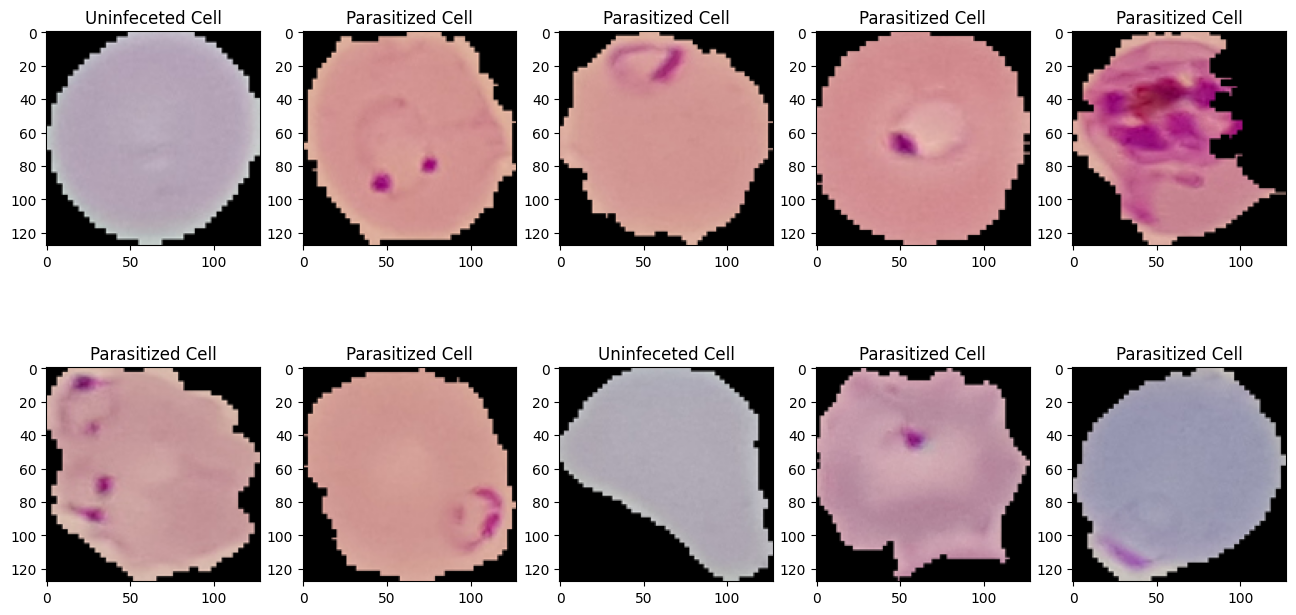

In [8]:
# plotting data for visualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))

# 2 by 5 grid format
rows = 2
cols = 5 

for i in range(rows):
    for j in range(cols):
        # individual plot to grid
        ax = fig.add_subplot(rows, cols, i * cols + j + 1)
        ax.imshow(X_train[i * cols + j])
        
        # set title according to class
        if Y_train[i * cols + j]:
            ax.set_title('Parasitized Cell')
        else: 
            ax.set_title('Uninfeceted Cell')

fig.show()

In [ ]:
# creating both boxblur and gaussian blur filters, attempting to see whether image processing and maybe augmentation helps model performance   
from PIL import ImageFilter

box_blur_filter = ImageFilter.BoxBlur(radius=4)
gaussian_blur_filter = ImageFilter.GaussianBlurr(radius=4)

In [ ]:


# import tensorflow in as well
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model

2025-11-14 22:43:40.665431: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 22:43:45.720758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-14 22:44:03.776108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
